In [2]:
from fastbook import *

In [2]:
grizzly_urls = search_images_ddg('grizzly bear', max_images=100)

In [3]:
grizzly_urls

(#100) ['https://www.lintelligencer.com/wp-content/uploads/2020/09/Alaska-Grizzly-kills-hunter-in-attack-at-national-park-Report-1068x800.jpg','https://www.tsln.com/wp-content/uploads/2018/10/bears-tsln-101318-1-1240x823.jpg','https://bloximages.chicago2.vip.townnews.com/trib.com/content/tncms/assets/v3/editorial/b/99/b99f2459-eeaf-5c68-b911-40d6bfeed4bb/55a455f7a311f.image.jpg?resize=1200%2C860','https://www.vitalground.org/wp-content/uploads/2019/12/SowFish4-3_JimCole_web-featured.jpg?is-pending-load=1','https://patch.com/img/cdn20/users/598175/20180615/043017/styles/raw/public/processed_images/grizzly_and_cubs-1529051362-9813.jpg','https://gohunt-assets-us-west-2.s3.amazonaws.com/Grizzly-bear-protections-west-OG.jpg','https://media.spokesman.com/photos/2018/08/18/Grizzly_Bears_Montana.JPG.jpg','https://www.montanaoutdoor.com/wp-content/uploads/2018/02/Grizzly-King-FEAT.jpg','https://1.bp.blogspot.com/-CoOIzMhLQUI/UHzVx6IxyVI/AAAAAAAAA-c/RHMhnAXXniU/s1600/Grizzly+Bear+Sleepy.jpg','ht

In [8]:
len(grizzly_urls),grizzly_urls[0]

(100,
 'https://www.huntingillustrated.com/wp-content/uploads/2014/03/Depositphotos_93855856_xl-2015-1-scaled.jpg')

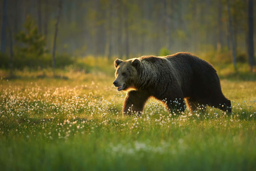

In [5]:
download_url(grizzly_urls[0], 'images/bear.jpg')
im = Image.open('images/bear.jpg')
im.thumbnail((256,256))
im

In [135]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [136]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        print(f'{o} bear')
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear', max_images=150)
        download_images(dest, urls=results)

grizzly bear
black bear
teddy bear


In [137]:
path.ls()

(#3) [Path('bears/black'),Path('bears/grizzly'),Path('bears/teddy')]

In [138]:
fns = get_image_files(path)
fns

(#409) [Path('bears/black/00000000.jpg'),Path('bears/black/00000001.jpg'),Path('bears/black/00000003.jpg'),Path('bears/black/00000005.jpg'),Path('bears/black/00000007.jpg'),Path('bears/black/00000008.jpg'),Path('bears/black/00000009.jpg'),Path('bears/black/00000011.jpg'),Path('bears/black/00000014.jpg'),Path('bears/black/00000015.jpg')...]

In [139]:
failed = verify_images(fns)
failed

(#3) [Path('bears/teddy/00000001.png'),Path('bears/teddy/00000081.jpg'),Path('bears/teddy/00000103.jpg')]

In [140]:
failed.map(Path.unlink)

(#3) [None,None,None]

In [141]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [72]:
bears

In [142]:
dls = bears.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [71]:
dls

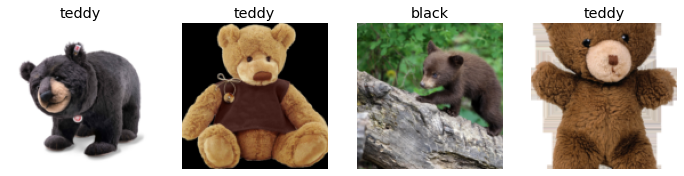

In [11]:
dls.valid.show_batch(max_n=4,nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


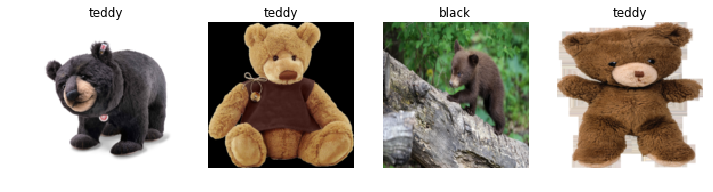

In [80]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


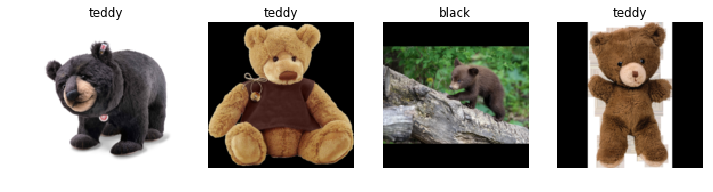

In [88]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode=PadMode.Zeros))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


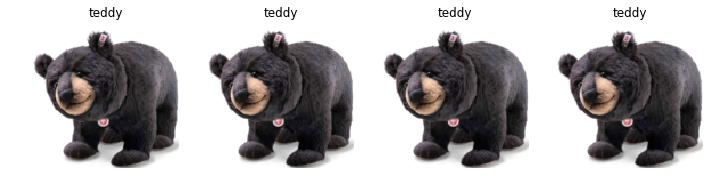

In [93]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1, unique=True)

In [143]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [144]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

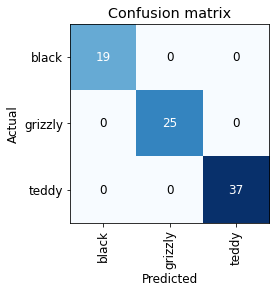

In [145]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

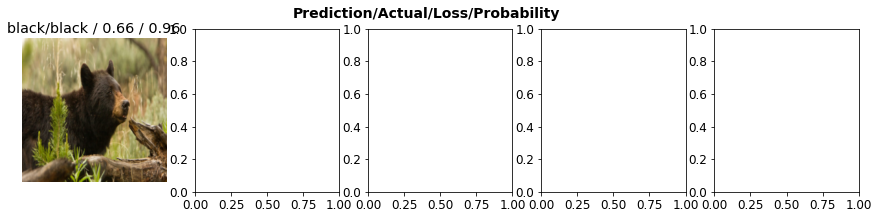

In [146]:
interp.plot_top_losses(5, nrows=1)

In [20]:
from fastai.vision.widgets import *

In [147]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [126]:
for idx, cat in cleaner.change():
    f = cleaner.fns[idx]
    print(f)
    os.rename(f, f.parent/(f.parent.name+f.stem+f.suffix))
    shutil.move('/'.join((f.parent/(f.parent.name+f.stem+f.suffix)).parts), path/cat )

bears\black\00000000.jpg


In [148]:
learn.export()

In [3]:
path = Path()

In [152]:
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [9]:
learn_inf = load_learner('../models/bear_model.pkl')

In [156]:
learn_inf.predict('images/bear.jpg')

('grizzly', TensorBase(1), TensorBase([1.4273e-02, 9.8517e-01, 5.5619e-04]))

In [157]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [158]:
##Creating a notebook app from model

In [10]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [12]:
img = PILImage.create(btn_upload.data[-1])

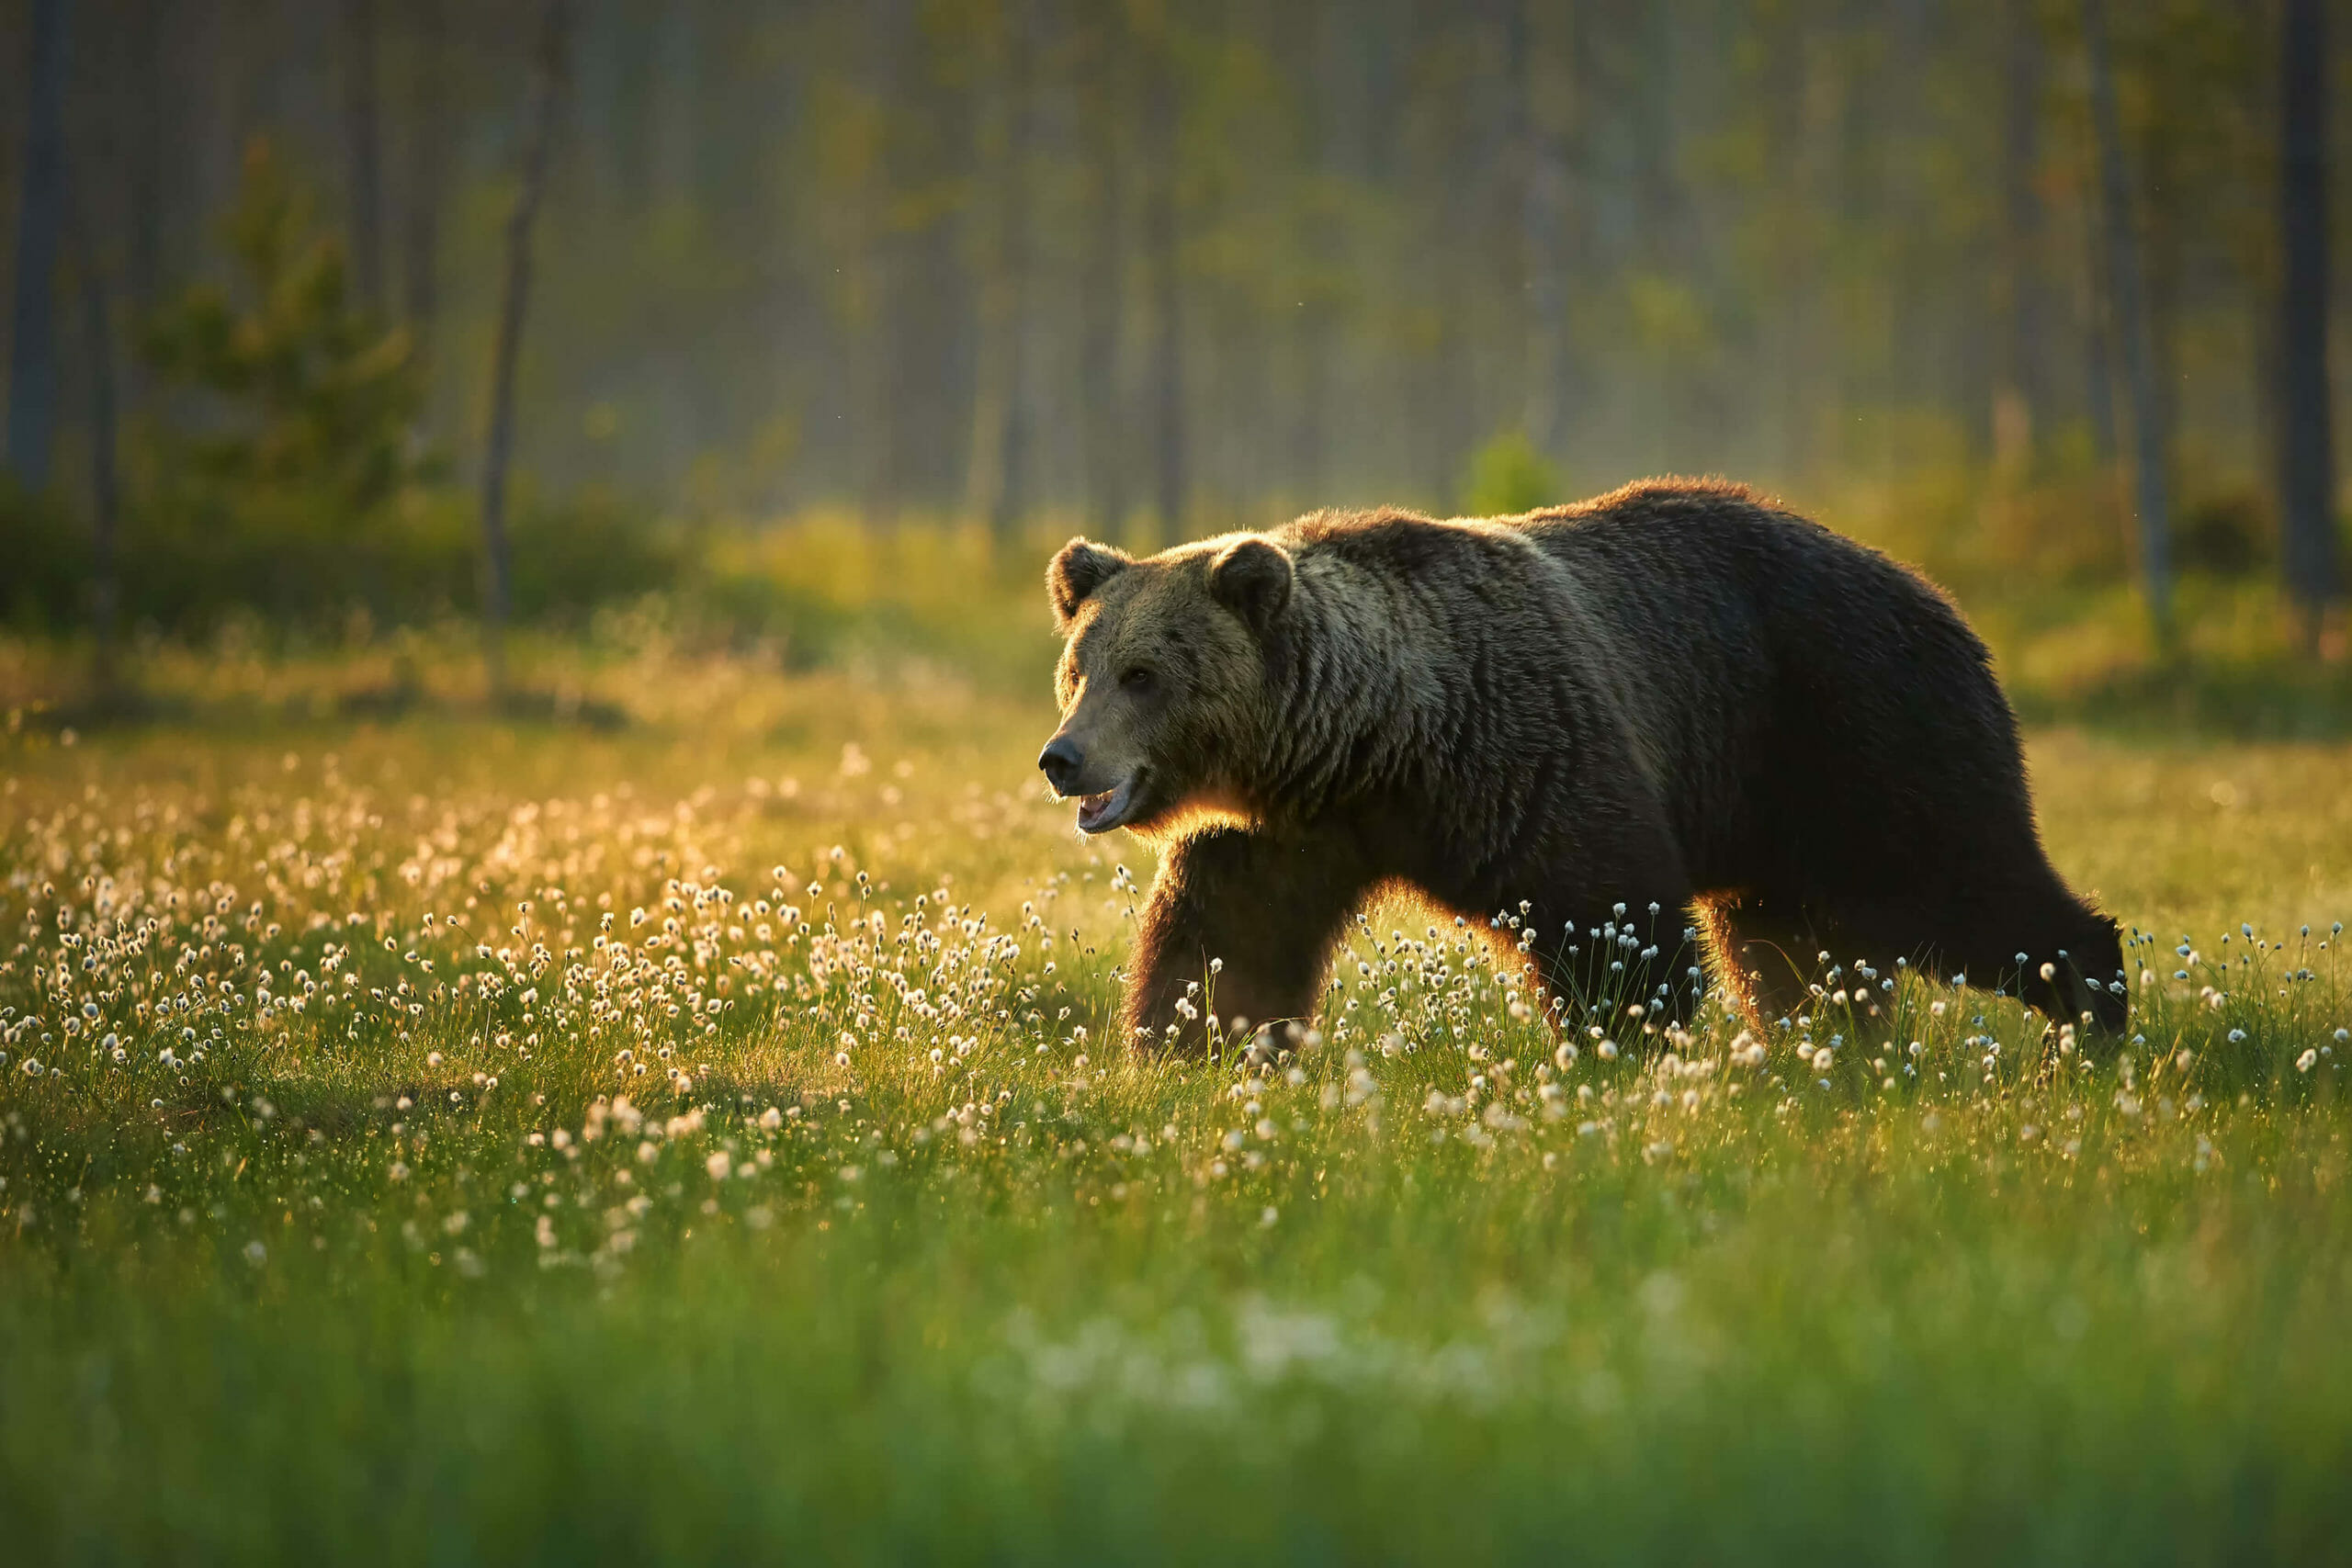

In [163]:
img

In [13]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [14]:
pred, pred_idx, probs = learn_inf.predict(img)

In [15]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9852')

In [16]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [17]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred, pred_idx, probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [18]:
btn_run.on_click(on_click_classify)

In [21]:
VBox([widgets.Label('Select your bear!'),
     btn_upload, btn_run, out_pl, lbl_pred])

In [193]:
## notebook app to real app

In [194]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: C:\Users\hecto\Anaconda23\etc\jupyter
    - Validating...
      voila 0.3.0 ok
